In [3]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.applications.vgg16 import VGG16
import numpy as np
from glob import glob
import tqdm
import matplotlib.pyplot as plt

In [4]:
import pandas as pd 
import skimage.io
import tensorflow 

from tqdm import tqdm 

from skimage.io import imread, imshow
# from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
import seaborn as sns

%matplotlib inline

In [5]:
IMAGE_SIZE=[224,224]

In [6]:
train_path='DATASET/DATASET/TRAIN'
test_path='DATASET/DATASET/TEST'

In [7]:
from tensorflow.keras.layers import Input

In [8]:
vgg=VGG16(input_shape=IMAGE_SIZE+[3],weights='imagenet',include_top=False)

#don't train existing weights
for layer in vgg.layers:
    layer.trainable=False


In [9]:
#useful for getting number of classes
folders=glob('DATASET/DATASET/TRAIN')

In [10]:
from  tensorflow.keras.models import Model

In [11]:
#layers in vgg
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)

#create a model object
model= Model(inputs=vgg.input,outputs=prediction)

#view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
#tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [13]:
from keras.preprocessing.image import ImageDataGenerator

In [14]:
train_datagen=ImageDataGenerator(rescale = 1.0 / 255.0,
                                   zoom_range = 0.4,
                                   rotation_range = 10,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   validation_split = 0.2)

test_datagen=ImageDataGenerator(rescale = 1.0 / 255.0)

training_set=train_datagen.flow_from_directory(directory = 'E:\Projectwork\coursera\waste_classification\DATASET\DATASET\TEST',
                                                   target_size = (224,224),
                                                   class_mode = 'binary',
                                                   batch_size = 128, 
                                                   subset = 'training')

Found 2011 images belonging to 2 classes.


In [15]:
valid_datagen=ImageDataGenerator(rescale=1.0/255.0,validation_split=0.2)


In [16]:
valid_dataset = valid_datagen.flow_from_directory(directory = 'E:\Projectwork\coursera\waste_classification\DATASET\DATASET\TRAIN',
                                                  target_size = (224,224),
                                                  class_mode = 'binary',
                                                  batch_size = 128, 
                                                  subset = 'validation')

Found 4512 images belonging to 2 classes.


In [17]:
#Class Indices
training_set.class_indices

{'O': 0, 'R': 1}

100%|██████████| 5/5 [00:21<00:00,  4.27s/it]


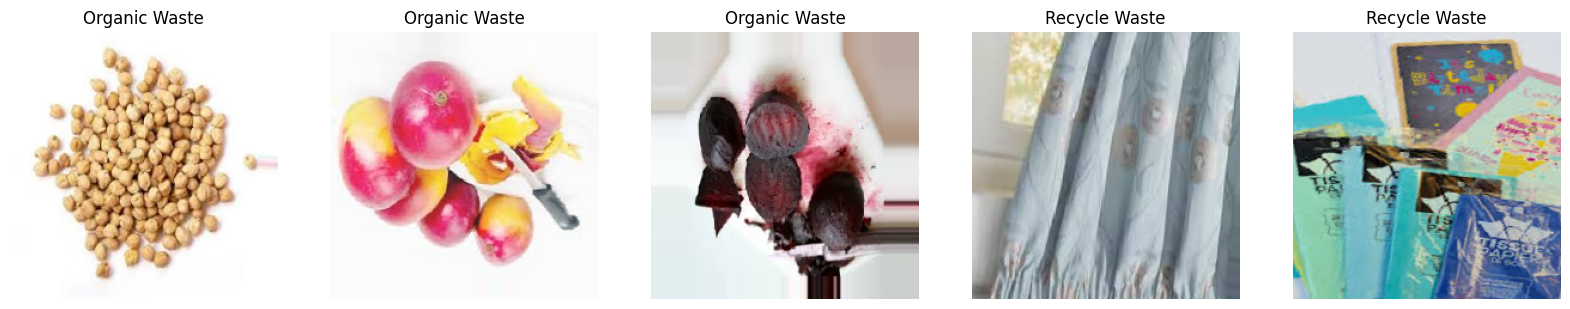

In [18]:
#Viewing Images
fig,ax=plt.subplots(nrows=1,ncols=5,figsize=(20,20))
for i in tqdm(range(5)):
    rand1 = np.random.randint(len(training_set))
    rand2 = np.random.randint(128)
    ax[i].imshow(training_set[rand1][0][rand2])
    ax[i].axis('off')
    label = training_set[rand1][1][rand2]
    if label == 1:
        ax[i].set_title('Recycle Waste')
    else:
        ax[i].set_title('Organic Waste')
    

MODEL BUILDING

In [19]:
base_model=VGG16(input_shape=(224,224,3),
                 include_top=False,
                 weights="imagenet")

In [20]:
for layer in base_model.layers:
    layer.trainable=False

In [21]:
#Summary

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

 block4_conv2 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_conv3 (Conv2D)       (None, 28, 28, 512)       2359808   
                                                                 
 block4_pool (MaxPooling2D)  (None, 14, 14, 512)       0         
                                                                 
 block5_conv1 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv2 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_conv3 (Conv2D)       (None, 14, 14, 512)       2359808   
                                                                 
 block5_pool (MaxPooling2D)  (None, 7, 7, 512)         0         
                                                                 
Total params: 14714688 (56.13 MB)
Trainable params: 0 (0.00 Byte)
Non-traina

In [22]:
# Defining Layers

model=Sequential()
model.add(base_model)
model.add(Dropout(0.2))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [23]:
#Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 batch_normalization (Batch  (None, 25088)             100352    
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 1024)              25691136  
                                                                 
 batch_normalization_1 (Bat  (None, 1024)              4096      
 chNormalization)                                       

In [24]:
#Model Compilation

OPT=tensorflow.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy',
              metrics=[tensorflow.keras.metrics.AUC(name='auc')],
              optimizer=OPT)

In [25]:
#Defining Callback

filepath = './model.h5'

earlystopping = EarlyStopping(monitor = 'val_auc', 
                              mode = 'max' , 
                              patience = 5,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_auc', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)


callback_list = [earlystopping, checkpoint]

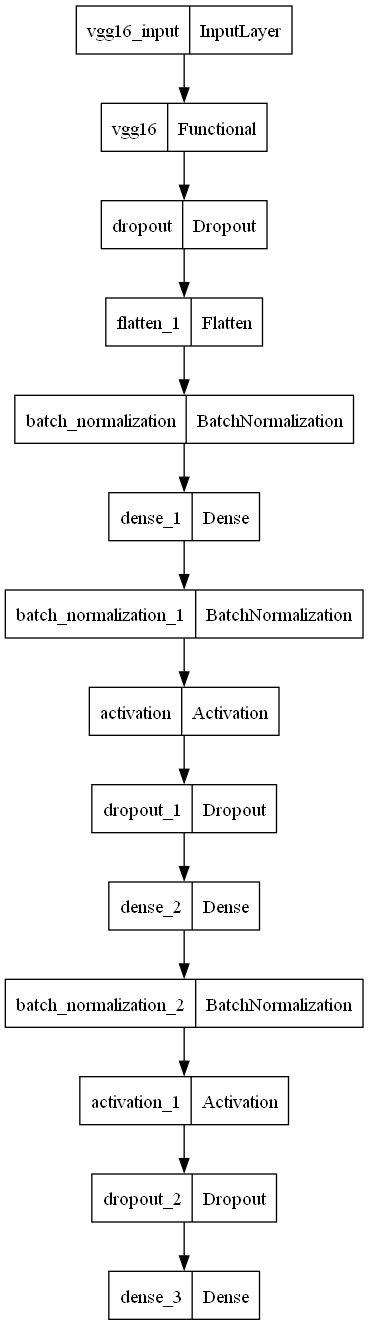

In [26]:
plot_model(model,to_file='model.png')

In [28]:
# Model Fitting 

model_history=model.fit(training_set,
                        validation_data=valid_dataset,
                        epochs = 15,
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/15
16/16 [==============================] - ETA: 0s - loss: 0.0402 - auc: 0.9985 
Epoch 1: val_auc did not improve from 0.89129
16/16 [==============================] - 826s 54s/step - loss: 0.0402 - auc: 0.9985 - val_loss: 0.6964 - val_auc: 0.8677
Epoch 2/15
16/16 [==============================] - ETA: 0s - loss: 0.0436 - auc: 0.9984 
Epoch 2: val_auc did not improve from 0.89129
16/16 [==============================] - 607s 39s/step - loss: 0.0436 - auc: 0.9984 - val_loss: 0.6699 - val_auc: 0.8835
Epoch 3/15
16/16 [==============================] - ETA: 0s - loss: 0.0420 - auc: 0.9989
Epoch 3: val_auc improved from 0.89129 to 0.89818, saving model to .\model.h5
16/16 [==============================] - 631s 41s/step - loss: 0.0420 - auc: 0.9989 - val_loss: 0.5999 - val_auc: 0.8982
Epoch 4/15
16/16 [==============================] - ETA: 0s - loss: 0.0410 - auc: 0.9990 
Epoch 4: val_auc did not improve from 0.89818
16/16 [==============================] - 549s 35s/step - loss:

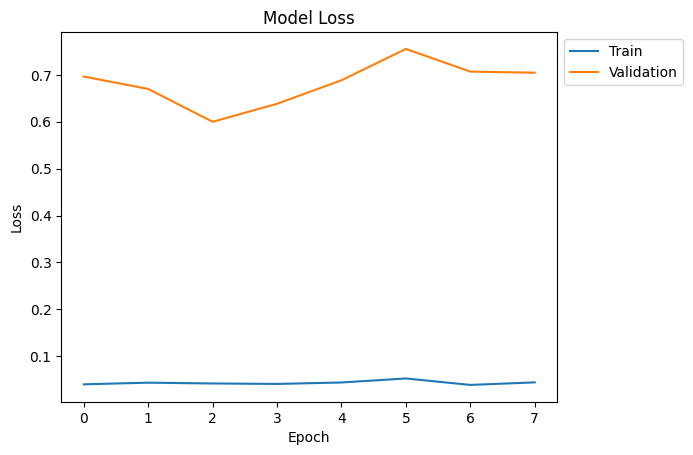

In [29]:
# Summarize the model loss

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()


In [30]:
# Test Data 
test_data = test_datagen.flow_from_directory(directory = 'E:\Projectwork\coursera\waste_classification\DATASET\DATASET\TEST',
                                             target_size = (224,224),
                                             class_mode = 'binary',
                                             batch_size = 128)

Found 2513 images belonging to 2 classes.


In [31]:
#AUC and loss
model.evaluate(test_data)

20/20 [==============================] - 892s 45s/step - loss: 0.1029 - auc: 0.9957


[0.10293625295162201, 0.9956855177879333]